In [6]:
import pandas 
import seaborn 
import matplotlib.pyplot as plt

mental_health = pandas.read_csv('Mental health Depression disorder Data.csv')

mental_health.head()

/var/folders/wy/_hw3zhvx363c_ckbd5r10m0c0000gn/T/ipykernel_85683/914791033.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mental_health = pandas.read_csv('Mental health Depression disorder Data.csv')


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [11]:
mental_health.describe()

,index,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,108553.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,54276.000000,3.989921,0.862278,3.497654,1.585821
std,31336.696223,1.167526,0.460679,0.655859,0.860283
min,0.000000,2.023393,0.383650,2.139903,0.446940
25%,27138.000000,3.188824,0.535064,3.005529,0.993685
50%,54276.000000,3.554373,0.726430,3.499606,1.479936
75%,81414.000000,4.682163,0.940157,3.912381,1.867834
max,108552.000000,8.967330,3.452476,6.602754,5.474668


In [4]:
mental_health.columns

Index(['index', 'Entity', 'Code', 'Year', 'Schizophrenia (%)',
       'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)'],
      dtype='object')

In [10]:
percentage_columns = ['Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']


percentage_columns = [column for column in percentage_columns if column in mental_health.columns]

mean_prevalence = mental_health[percentage_columns].mean()

sorted_mean_prevalence = mean_prevalence.sort_values(ascending=False)

highest_disorder = sorted_mean_prevalence.index[0]
highest_prevalence = sorted_mean_prevalence.iloc[0]

print(f"The mental health disorder with the highest mean prevalence is '{highest_disorder}' with a mean prevalence of {highest_prevalence:.2f}.")




The mental health disorder with the highest mean prevalence is 'Anxiety disorders (%)' with a mean prevalence of 3.99.


In [38]:
percentage_columns = mental_health[['Anxiety disorders (%)', 'Drug use disorders (%)',
                                    'Depression (%)',  'Alcohol use disorders (%)']]


top_3_disorders = percentage_columns.max().sort_values(ascending=False).head(3).index

top_3_percentages = percentage_columns.max().sort_values(ascending=False).head(3).values

Highest_percentage_population = pandas.DataFrame({'Disorder': top_3_disorders, 'Percentage': top_3_percentages})

print(Highest_percentage_population)



                    Disorder  Percentage
0      Anxiety disorders (%)    8.967330
1             Depression (%)    6.602754
2  Alcohol use disorders (%)    5.474668


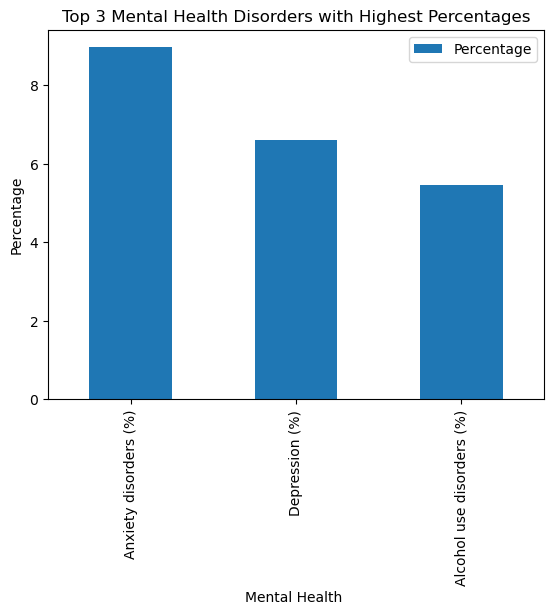

In [37]:

Highest_percentage_population.plot.bar(x="Disorder", y="Percentage")

plt.title('Top 3 Mental Health Disorders with Highest Percentages')
plt.xlabel('Mental Health ')
plt.ylabel('Percentage')
plt.show()



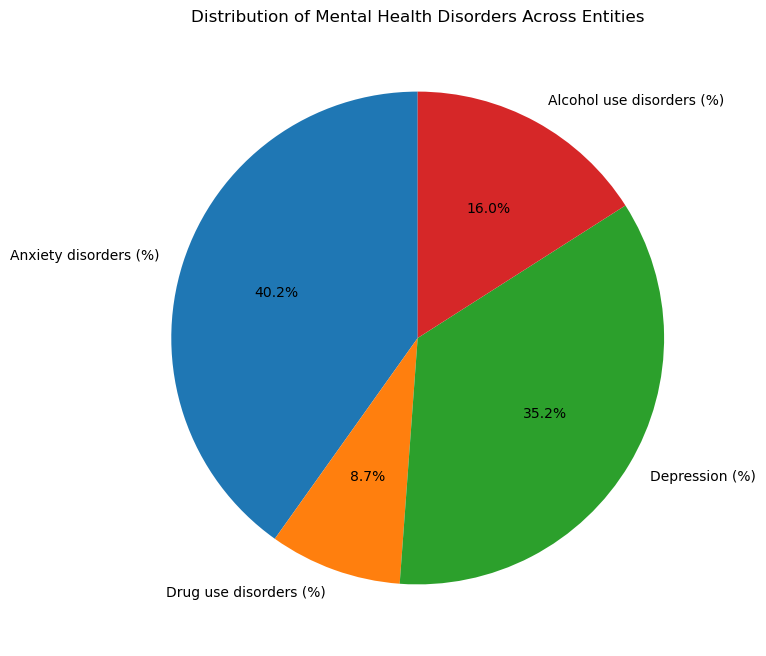

In [19]:
percentage_columns = ['Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']


percentage = mental_health[percentage_columns]

total_percentages = percentage.sum()

total_percentages.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Distribution of Mental Health Disorders Across Entities')
plt.ylabel('')
plt.show()

In [20]:

sorted_by_anxiety = mental_health.sort_values(by="Anxiety disorders (%)", ascending=False)

max_anxiety_row = sorted_by_anxiety.iloc[0]

print("Country with the highest anxiety percentage:")
print("Year:", max_anxiety_row["Year"])
print("Entity (Country):", max_anxiety_row["Entity"])
print("Anxiety disorders (%):", max_anxiety_row["Anxiety disorders (%)"])
print("Index:", max_anxiety_row["index"])

Country with the highest anxiety percentage:
Year: 2002
Entity (Country): New Zealand
Anxiety disorders (%): 8.96733
Index: 4016


In [3]:
mental_health.groupby('Entity')['Anxiety disorders (%)'].max().sort_values(ascending=False).head(10)



Entity
New Zealand         8.967330
Northern Ireland    8.124301
Norway              7.680800
Netherlands         7.271261
Iran                7.174615
Australasia         7.064532
United States       6.971995
Germany             6.784381
France              6.782676
North America       6.775812
Name: Anxiety disorders (%), dtype: float64

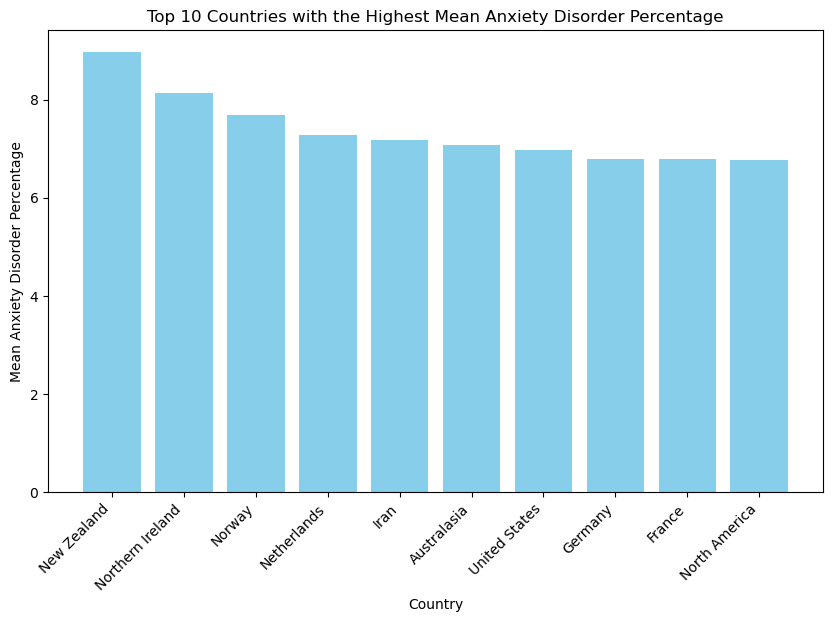

In [2]:
top_countries_data = {
    'New Zealand': 8.967330,
    'Northern Ireland': 8.124301,
    'Norway': 7.680800,
    'Netherlands': 7.271261,
    'Iran': 7.174615,
    'Australasia': 7.064532,
    'United States': 6.971995,
    'Germany':  6.784381,
    'France': 6.782676,
    'North America': 6.775812
}


plt.figure(figsize=(10, 6))
plt.bar(top_countries_data.keys(), top_countries_data.values(), color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Anxiety Disorder Percentage')
plt.title('Top 10 Countries with the Highest Mean Anxiety Disorder Percentage')
plt.xticks(rotation=45, ha='right')  
plt.show()

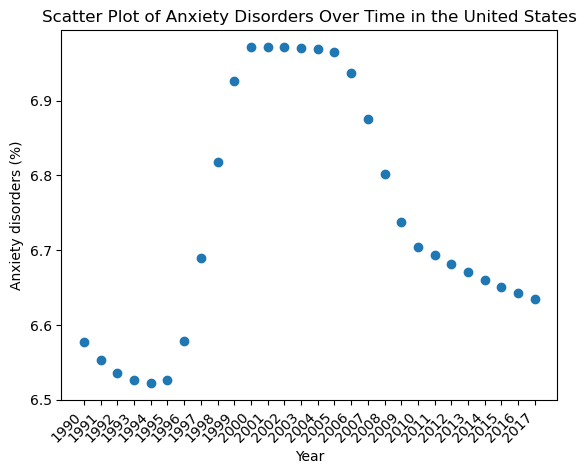

In [45]:
anxiety_disorder_column = mental_health.loc[6076:6103, ["Entity", "Year", "Anxiety disorders (%)"]]

plt.scatter(anxiety_disorder_column['Year'], anxiety_disorder_column['Anxiety disorders (%)'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Anxiety disorders (%)')
plt.title('Scatter Plot of Anxiety Disorders Over Time in the United States')
plt.xticks(rotation=45, ha='right') 
# Show the plot
plt.show()



In [18]:

sorted_by_anxiety = mental_health.sort_values(by='Anxiety disorders (%)')
row_with_lowest_anxiety = sorted_by_anxiety.iloc[0]


country_with_lowest_anxiety = row_with_lowest_anxiety['Entity']
lowest_anxiety_percentage = row_with_lowest_anxiety['Anxiety disorders (%)']

print(f"The country with the lowest anxiety percentage is: {country_with_lowest_anxiety} with a percentage of {lowest_anxiety_percentage:.2f}%")




The country with the lowest anxiety percentage is: Vietnam with a percentage of 2.02%


In [37]:
sorted_by_anxiety = mental_health.sort_values(by='Anxiety disorders (%)')
unique_countries_with_lowest_anxiety = sorted_by_anxiety.drop_duplicates(subset='Entity').head(3)



for _, row in unique_countries_with_lowest_anxiety.iterrows():
    anxiety_percentage = row['Anxiety disorders (%)']
    print(f"{row['Entity']} {anxiety_percentage:.2f}%")


Vietnam 2.02%
Mongolia 2.50%
Tajikistan 2.51%
